In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 7]

In [23]:
dataset = pd.read_csv('/Users/vaibhavgupta/gatom/gatom-ml/gupta2007vaibhav/Machine-Learning-with-Python/data/Housing_Data.csv') # path for dataset


In [24]:
dataset.head()

,Size(Sq. Ft),Price
0,477,50367
1,496,61683
2,524,63517
3,571,63755
4,770,66702


In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
Size(Sq. Ft)    50 non-null int64
Price           50 non-null int64
dtypes: int64(2)
memory usage: 880.0 bytes


In [26]:
dataset.describe()

,Size(Sq. Ft),Price
count,50.000000,50.000000
mean,2114.980000,217476.080000
std,1073.095284,119211.940921
min,477.000000,50367.000000
25%,969.000000,118404.250000
50%,2208.500000,180029.000000
75%,2938.500000,311253.500000
max,3970.000000,443719.000000


In [27]:
indepX = dataset.iloc[:,[0]].values
depY = dataset.iloc[:,[1]].values

In [28]:
from sklearn.preprocessing import StandardScaler
scale =  StandardScaler()
indepX = scale.fit_transform(indepX)
depY = scale.fit_transform(depY)

/Users/vaibhavgupta/anaconda3/envs/gatom-ml/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/vaibhavgupta/anaconda3/envs/gatom-ml/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/vaibhavgupta/anaconda3/envs/gatom-ml/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/vaibhavgupta/anaconda3/envs/gatom-ml/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [29]:
from sklearn.model_selection import train_test_split
indepX_train, indepX_test, depY_train, depY_test = train_test_split(indepX, depY, 
                                                                    test_size = 0.3, 
                                                                    random_state = 42)

In [30]:
# Hypothesis Function

def hyp(theta, x):
    return theta[0] + theta[1] * x

In [31]:
#Cost Function

def errorFunc(theta, indepX, depY):
    
    m = len(indepX)
    error = 0
    for i in range(m):
        
        x = indepX[i]
        y = depY[i]
        error += (y - (theta[1] * x + theta[0])) ** 2
        
    return error / (2*m)

In [32]:
# Gradient / Del Function

def grad(indepX, depY, curr_theta, learning_rate):
    grad = np.zeros(2)
    new_theta = curr_theta
    m = len(indepX)
    
    # Adjustments
    for i in range(m):
        
        x = indepX[i]
        y = depY[i]
        
        grad[0] += (-1/m) * (y - (curr_theta[0] + (curr_theta[1] * x)))
        grad[1] += (-1/m) * x * (y - (curr_theta[0] + (curr_theta[1] * x)))
    
    temp0 = curr_theta[0] - (learning_rate * grad[0])
    temp1 = curr_theta[1] - (learning_rate * grad[1])
    
    new_theta[0] = temp0
    new_theta[1] = temp1
    
    return new_theta

In [33]:
# Gradient Descent Function

def gradientDescent(indepX,depY, init_theta, learning_rate, num_iterations):
    
    theta = init_theta
    J = [0 for i in range(num_iterations)]

    for i in range(num_iterations):
        
        theta = grad(indepX, depY, theta, learning_rate)
        J[i] = errorFunc(theta, indepX, depY)
        
    return theta, J

In [34]:
def main():
    
    init_theta = np.zeros(2)
    learning_rate = 0.05
    num_iterations = 100
    H = [0 for i in range(len(indepX_train))]
    J = [0 for i in range(num_iterations)]
    
    theta, J = gradientDescent(indepX_train, depY_train, init_theta, learning_rate, num_iterations)
    H = hyp(theta, indepX_train)
    
    for i in range(len(depY_test)):
        print(float(H[i]))
        print(depY_test[i])
        print('----------')

    
    # Visualize J
    plt.plot(J, color = 'green')
    plt.title('Error vs No.Itrerations')
    plt.xlabel('Itrerations')
    plt.ylabel('Cost Function')
    plt.show()
    
    # Visualize H
    plt.scatter(indepX_train, depY_train, color = 'red')
    plt.plot(indepX_train, H, color = 'blue')
    plt.title('Size vs Price (Training set)')
    plt.xlabel('Size')
    plt.ylabel('Price')
    plt.show()
    
        

-1.214378974254815
[-0.83847041]
----------
1.2118881972777025
[0.97874079]
----------
1.3521295562669262
[0.36825286]
----------
1.3970434555510567
[1.57113761]
----------
-0.6607464198136966
[-0.50656855]
----------
-1.1786311768654052
[1.87743229]
----------
-0.5131721793086966
[-0.23859989]
----------
0.06429224005869519
[-0.28786532]
----------
0.5913430990051243
[0.5509942]
----------
0.40618784073177
[-0.48886723]
----------
-1.505861014506927
[-0.83983466]
----------
1.2375532825829199
[-1.27759702]
----------
0.21369970094263943
[0.80132933]
----------
0.567511234078851
[-1.08194194]
----------
-1.2235450761495357
[-1.30256868]
----------


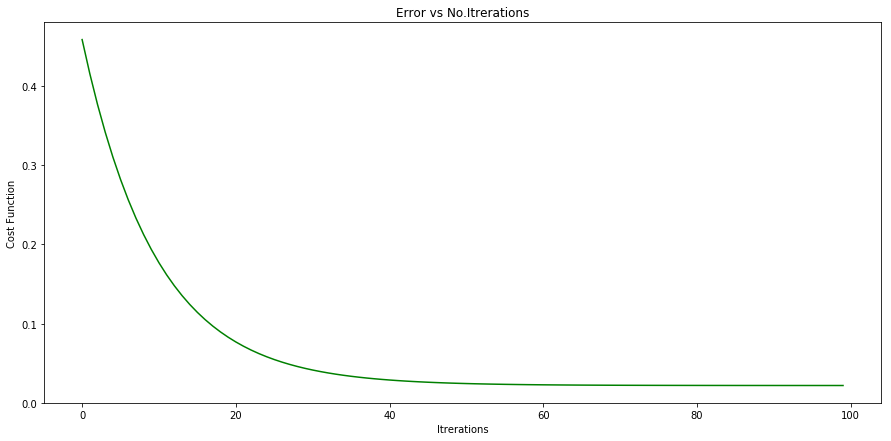

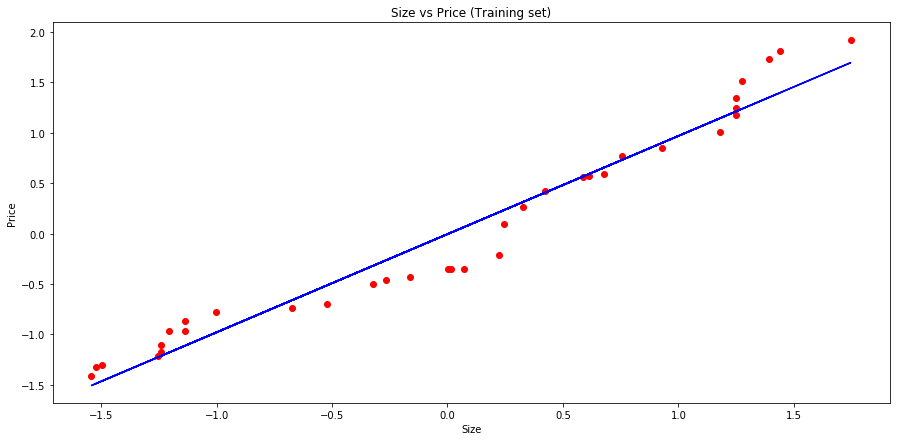

In [35]:
if __name__ == '__main__':
    main()

### SGD

In [36]:
from sklearn.linear_model import SGDRegressor
SLR = SGDRegressor(max_iter = 100, shuffle = True)
depY_train = np.ravel(depY_train)
SLR.fit(indepX_train, depY_train)

/Users/vaibhavgupta/anaconda3/envs/gatom-ml/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=100,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

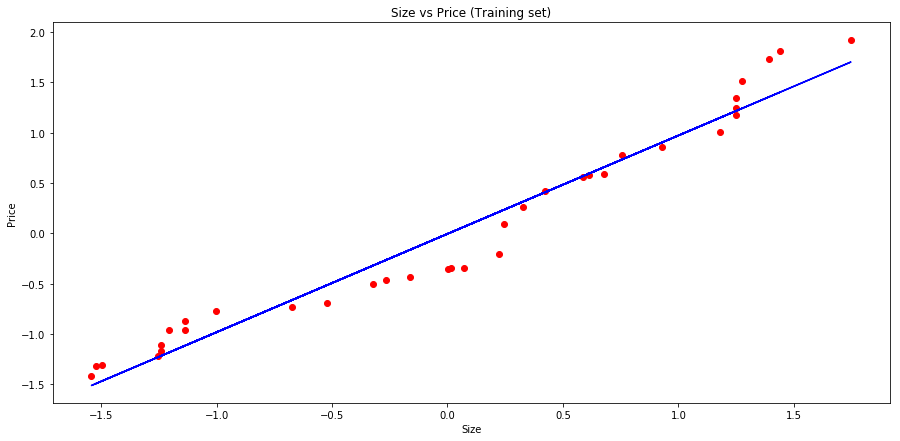

In [37]:
# Visualize H
plt.scatter(indepX_train, depY_train, color = 'red')
plt.plot(indepX_train, SLR.predict(indepX_train), color = 'blue')
plt.title('Size vs Price (Training set)')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()